In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

This code is submitted as part of project 2 for the subject COMP90037 (Security Analytics) at the University of  Melbourne .
     
    -------------------------------------------
    COMP90037 Security Analytics - Project 2 
    Machine learning based Threat detection

    Author : Mohammed Ahsan Kollathodi 
    Student id: 1048942.
    

### Train

In [2]:
pd_train = pd.read_csv('train_data_with_PCA_A1.csv', sep=',')

In [3]:
pd_train.head()

,PC1,PC2,PC3
0,2061.643438,6851.147699,-21125.993494
1,-818.914845,-17982.407564,5594.477966
2,-4025.163308,-9111.396463,-13531.652440
3,27019.553774,17440.296424,17247.812563
4,-22741.822775,-3447.456107,11580.003226


In [4]:
# set the contamination factor equal to a value of 0.02 
isln_forest = IsolationForest(contamination=0.02)

In [5]:
isln_forest.fit(pd_train)

IsolationForest(contamination=0.02)

### Test

In [6]:
pd_test = pd.read_csv('test_data_with_PCA_A1.csv', sep=',')

In [7]:
pd_test.shape

(348477, 3)

In [9]:
predict_test = isln_forest.predict(pd_test)
decision_function = isln_forest.decision_function(pd_test)

In [10]:
pd_test['Anomalies'] = predict_test
pd_test['Score'] = decision_function

In [11]:
pd_test['Anomalies'].value_counts() # The value of -1 would correspond to the number of anomalies.

 1    265607
-1     82870
Name: Anomalies, dtype: int64

In [12]:
pd_test.loc[pd_test['Anomalies'] == -1]

,PC1,PC2,PC3,Anomalies,Score
7,-91318.385655,64601.275923,10382.077213,-1,-0.000185
12,-88204.871536,71163.418069,-4694.933169,-1,-0.002271
14,-99134.173354,75876.164019,10045.078713,-1,-0.018415
16,-107747.064948,77069.120928,26056.215806,-1,-0.023378
27,-94850.321278,81609.477525,-8083.679355,-1,-0.029864
...,...,...,...,...,...
348445,-94964.591719,77548.570887,-1254.341229,-1,-0.020341
348451,-110840.398540,89279.931031,12380.087492,-1,-0.046591
348453,-90807.521134,66389.640633,34677.628044,-1,-0.003220
348454,-90808.344326,66381.554500,34695.302801,-1,-0.003220


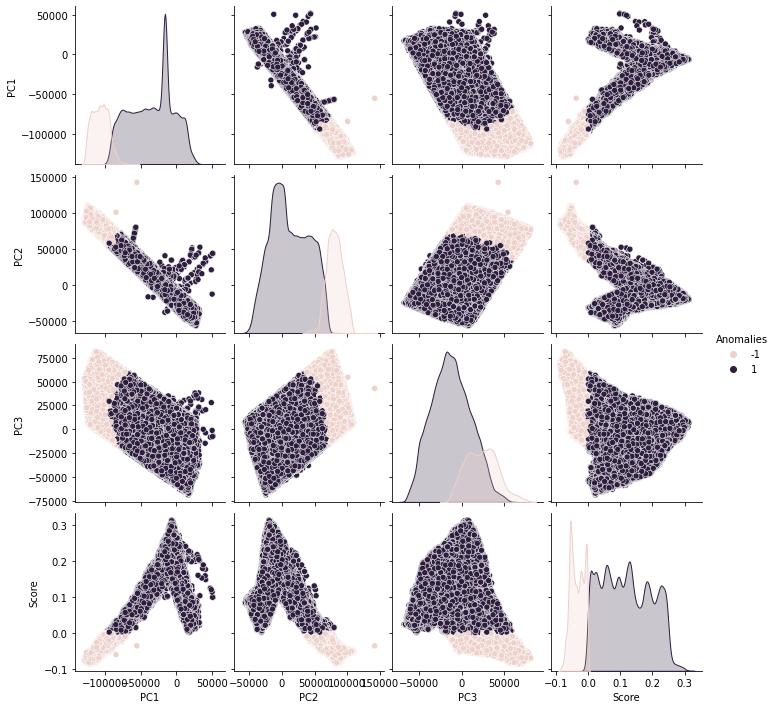

In [13]:
sns.pairplot(pd_test, hue = 'Anomalies')

In [14]:
Anomalies = pd_test.loc[pd_test['Anomalies'] == -1]

In [15]:
Anomalies.head()

,PC1,PC2,PC3,Anomalies,Score
7,-91318.385655,64601.275923,10382.077213,-1,-0.000185
12,-88204.871536,71163.418069,-4694.933169,-1,-0.002271
14,-99134.173354,75876.164019,10045.078713,-1,-0.018415
16,-107747.064948,77069.120928,26056.215806,-1,-0.023378
27,-94850.321278,81609.477525,-8083.679355,-1,-0.029864


In [18]:
test_original = pd.read_csv('testdata_cleaned.csv', sep = ',')

In [17]:
Anomalies_feat_orig = test_original[test_original.index.isin(Anomalies.index)]

In [19]:
Anomalies_feat_orig  = Anomalies_feat_orig .merge(Anomalies[['Score']], left_index = True, right_index=True)

In [20]:
Anomalies_feat_orig.head(40)

,timestamp,duration,protocol,src_ip,src_port,direction,dst_ip,dst_port,state,srctype_service,dsttype_service,num_total_packets,total_bytes,src_bytes,packets_in_Sec,bytes_total_in_Sec,Source_Bytes_Sec,Score
7,2021-08-15 18:24:13.365134,0.000178,udp,85.76.247.59,39051,->,150.35.87.121,1154,INT,0.0,NaN,0,146,145,0.000000,819203.712438,813592.728107,-0.000185
12,2021-08-15 18:24:13.381452,14.569587,tcp,85.212.197.15,2039,<->,150.35.89.168,12116,FRPA_FPA,0.0,0.0,14,1063,508,0.960906,72.960200,34.867151,-0.002271
14,2021-08-15 18:24:13.415082,0.000718,udp,89.164.87.201,31481,<->,150.35.87.232,13363,CON,0.0,0.0,2,136,75,2785.504864,189414.330761,104456.432405,-0.018415
16,2021-08-15 18:24:13.437170,127.416917,tcp,92.138.155.109,48073,->,150.35.90.223,1126,FPA_FPA,0.0,0.0,28,1998,1186,0.219751,15.680806,9.308026,-0.023378
27,2021-08-15 18:24:13.634085,3587.942491,tcp,88.210.58.81,1056,->,150.35.87.232,13364,PA_PA,0.0,0.0,199,17978,10663,0.055464,5.010671,2.971898,-0.029864
31,2021-08-15 18:24:13.687039,2930.674414,udp,97.182.106.187,6909,<->,150.35.87.232,13365,CON,0.0,0.0,8,985,741,0.002730,0.336100,0.252843,-0.059918
32,2021-08-15 18:24:13.692871,0.000183,tcp,87.15.57.39,49817,->,150.35.87.121,6882,S_RA,0.0,0.0,1,122,61,5468.811948,667195.057616,333597.528808,-0.006114
37,2021-08-15 18:24:13.756049,357.934266,tcp,97.129.189.70,57952,->,150.35.87.232,80,RPA_PA,0.0,0.0,55,4972,3209,0.153659,13.890819,8.965333,-0.066062
38,2021-08-15 18:24:13.778314,0.000690,udp,89.103.136.202,61179,<->,150.35.87.232,13364,CON,0.0,0.0,2,554,73,2896.491246,802328.075026,105721.930464,-0.007338
54,2021-08-15 18:24:14.252531,981.949038,tcp,85.180.232.243,1026,->,150.35.87.232,13362,RPA_PA,0.0,0.0,42,3661,2633,0.042772,3.728299,2.681402,-0.014757


In [21]:
Anomalies_feat_orig.head(40)

,timestamp,duration,protocol,src_ip,src_port,direction,dst_ip,dst_port,state,srctype_service,dsttype_service,num_total_packets,total_bytes,src_bytes,packets_in_Sec,bytes_total_in_Sec,Source_Bytes_Sec,Score
7,2021-08-15 18:24:13.365134,0.000178,udp,85.76.247.59,39051,->,150.35.87.121,1154,INT,0.0,NaN,0,146,145,0.000000,819203.712438,813592.728107,-0.000185
12,2021-08-15 18:24:13.381452,14.569587,tcp,85.212.197.15,2039,<->,150.35.89.168,12116,FRPA_FPA,0.0,0.0,14,1063,508,0.960906,72.960200,34.867151,-0.002271
14,2021-08-15 18:24:13.415082,0.000718,udp,89.164.87.201,31481,<->,150.35.87.232,13363,CON,0.0,0.0,2,136,75,2785.504864,189414.330761,104456.432405,-0.018415
16,2021-08-15 18:24:13.437170,127.416917,tcp,92.138.155.109,48073,->,150.35.90.223,1126,FPA_FPA,0.0,0.0,28,1998,1186,0.219751,15.680806,9.308026,-0.023378
27,2021-08-15 18:24:13.634085,3587.942491,tcp,88.210.58.81,1056,->,150.35.87.232,13364,PA_PA,0.0,0.0,199,17978,10663,0.055464,5.010671,2.971898,-0.029864
31,2021-08-15 18:24:13.687039,2930.674414,udp,97.182.106.187,6909,<->,150.35.87.232,13365,CON,0.0,0.0,8,985,741,0.002730,0.336100,0.252843,-0.059918
32,2021-08-15 18:24:13.692871,0.000183,tcp,87.15.57.39,49817,->,150.35.87.121,6882,S_RA,0.0,0.0,1,122,61,5468.811948,667195.057616,333597.528808,-0.006114
37,2021-08-15 18:24:13.756049,357.934266,tcp,97.129.189.70,57952,->,150.35.87.232,80,RPA_PA,0.0,0.0,55,4972,3209,0.153659,13.890819,8.965333,-0.066062
38,2021-08-15 18:24:13.778314,0.000690,udp,89.103.136.202,61179,<->,150.35.87.232,13364,CON,0.0,0.0,2,554,73,2896.491246,802328.075026,105721.930464,-0.007338
54,2021-08-15 18:24:14.252531,981.949038,tcp,85.180.232.243,1026,->,150.35.87.232,13362,RPA_PA,0.0,0.0,42,3661,2633,0.042772,3.728299,2.681402,-0.014757


In [22]:
Anomalies_feat_orig['src_ip'].nunique()

52353

In [23]:
import numpy as np
Anomalies_feat_orig.loc[Anomalies_feat_orig['packets_in_Sec'] != np.inf].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))


,duration,src_port,dst_port,srctype_service,dsttype_service,num_total_packets,total_bytes,src_bytes,packets_in_Sec,bytes_total_in_Sec,Source_Bytes_Sec,Score
count,82181,82181,82181,82179,76333,82181,82181,82181,81486,82181,82181,82181
mean,648.134,31929.4,14764.5,0.00734981,0.000157206,45.6368,24539,9242.81,1169.05,inf,inf,-0.0338158
std,1146.74,19914,8784.06,0.13776,0.0217163,5370.27,2.51966e+06,873527,3625.43,nan,nan,0.020493
min,0,3,0,0,0,0,59,0,0,0.0463038,0,-0.0858884
25%,0.000760104,14052,13361,0,0,1,138,75,0.00666879,1.86822,1.07803,-0.0513625
50%,0.00185647,30601,13363,0,0,2,366,146,589.72,148142,72011.1,-0.0348336
75%,696.954,50468,13365,0,0,4,705,453,1723.55,277399,106332,-0.0156036
max,3648.5,65537,65526,3,3,1.4842e+06,6.48146e+08,2.06801e+08,397887,inf,inf,-8.82771e-07


In [24]:
Anomalies_feat_orig.to_csv('test_A1_iForest_PCA_0.02_orig_feat.csv', sep=',')